In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Navier–Stokes equations:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$

$u$-momentum equation:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x} \\
& \qquad +\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)+F_{i,j}
\end{split}
$$

$v$-momentum equation:

$$
\begin{split}
& \frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y} \\
& \qquad +\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

Pressure equation:

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

Discretization of $u$, $v$, and $p$:

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right] \\
& + \Delta t F
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right]
\end{split}
$$

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2(\Delta x^2+\Delta y^2)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t} \left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} + \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

Initial conditions:

$u, v, p = 0$ everywhere

Boundary conditions:

$u, v, p$ are periodic on $x = 0, 2$

$u, v = 0$ at $y = 0,2$

$\frac{\partial p}{\partial y} = 0$ at $y = 0,2$

$F=1$ everywhere

In [2]:
def build_up_b(rho, dt, dx, dy, u, v):
    b = np.zeros_like(u)
    b[1:-1, 1:-1] = np.round((rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) +
                                      (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                            ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                            2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                                 (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                            ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2)),2)
    
    return b

In [3]:
def pressure_poisson_periodic(p, dx, dy, u, v):
    pn = np.empty_like(p)
    b = build_up_b(rho, dt, dx, dy, u, v)
    
    for q in range(nit):
        pn = p.copy()
        
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])
        
        #Top and bottom wall BCs: dp/dy = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 at y = 2
        p[0, :] = p[1, :]  # dp/dy = 0 at y = 0
        
        #Left and right wall BCs: p = 0
        p[:,0] = 0
        p[:,-1] = 0
    
    return p

In [27]:
## udiff method

##variable declarations
nit = 50
dt = .01

##physical variables
c = 0.01
rho = 1
nu = .1
F = 1

##while loop running conditions
udiff_lim = 0.001

def cavity_flow(L, dx, dy):
    ##variable declarations
    nx = int(L/dx) + 1
    x = np.linspace(-L/2, L/2, nx)
    ny = int(L/dy) + 1
    y = np.linspace(-L/2, L/2, ny)
    X, Y = np.meshgrid(x, y)

    #initial conditions
    u = np.zeros((ny, nx))
    un = np.zeros((ny, nx))

    v = np.zeros((ny, nx))
    vn = np.zeros((ny, nx))

    p = np.ones((ny, nx))
    pn = np.ones((ny, nx))

    b = np.zeros((ny, nx))
    
    ##while loop running conditions
    udiff = 1
    stepcount = 0
    
    while udiff > udiff_lim:
        #print(stepcount,udiff)
        #if stepcount > 50:
        #    break
        
        un = np.copy(u)
        vn = np.copy(v)
        pn = np.copy(p)
        
        p = pressure_poisson_periodic(p, dx, dy, u, v)

        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                         un[1:-1, 1:-1] * dt / dx * 
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy * 
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * 
                        (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 * 
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])) + 
                         F * dt)

        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                         un[1:-1, 1:-1] * dt / dx * 
                        (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                         dt / (2 * rho * dy) * 
                        (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                         nu * (dt / dx**2 *
                        (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                         dt / dy**2 * 
                        (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        # Cylinder BCs: u, v, p = 0
        cx = 0
        cy = 0
        r = 0.5

        mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
        u[mask] = 0
        v[mask] = 0
        
        #Top and bottom wall BCs: du/dy = 0
        u[-1, :] = u[-2, :]  # du/dy = 0 at y = 2
        u[0, :] = u[1, :]  # du/dy = 0 at y = 0

        #Top and bottom wall BCs: v = 0
        v[0, :] = 0
        v[-1, :] = 0
        
        #Left and right wall BCs: u = 1, v = 0 --> u = 0.01, v = 0
        u[:,0] = c
        u[:,-1] = c
        v[:,0] = 0
        v[:,-1] = 0

        udiff = (np.sum(u) - np.sum(un)) / np.sum(u)
        stepcount += 1
    
    return u, v, p, stepcount, X, Y, nx, ny, x, y

In [28]:
def window(list): #for 0.05 spacing
    row1 = int(np.floor(len(list)/2)-20)
    row2 = int(np.ceil(len(list)/2)+20)
    return row1,row2

L: 2
14
0.15885960448816638 0.005137804177356775


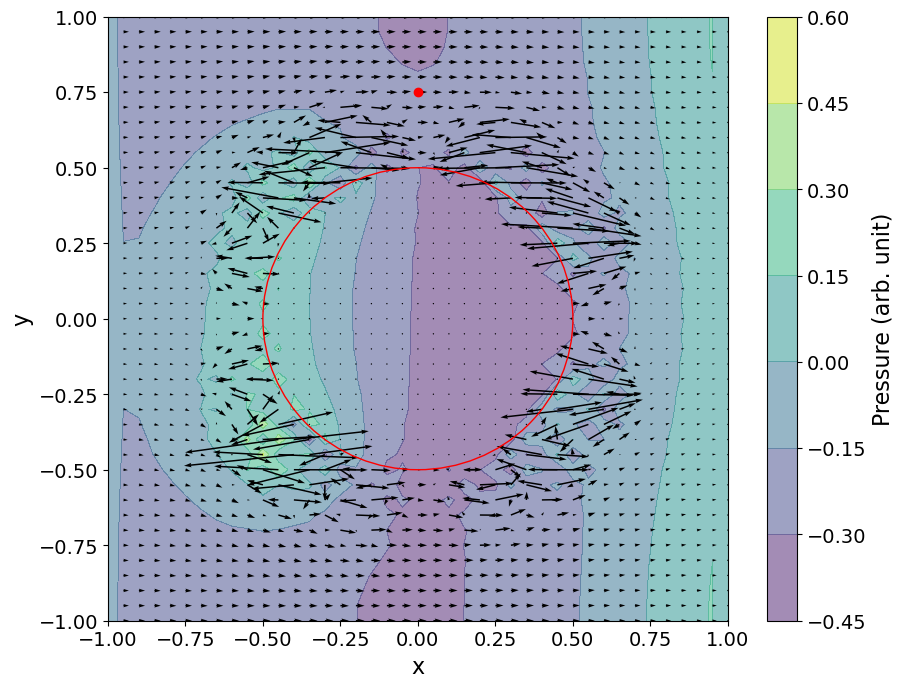

In [36]:
dx = 0.05
dy = 0.05
L = 2
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window(X)[0]:window(X)[1],window(X)[0]:window(X)[1]]
Y_win = Y[window(Y)[0]:window(Y)[1],window(X)[0]:window(X)[1]]
p_win = p[window(p)[0]:window(p)[1],window(X)[0]:window(X)[1]]
u_win = u[window(u)[0]:window(u)[1],window(X)[0]:window(X)[1]]
v_win = v[window(v)[0]:window(v)[1],window(X)[0]:window(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 3
15
0.1698664555307873 0.028093162008048393


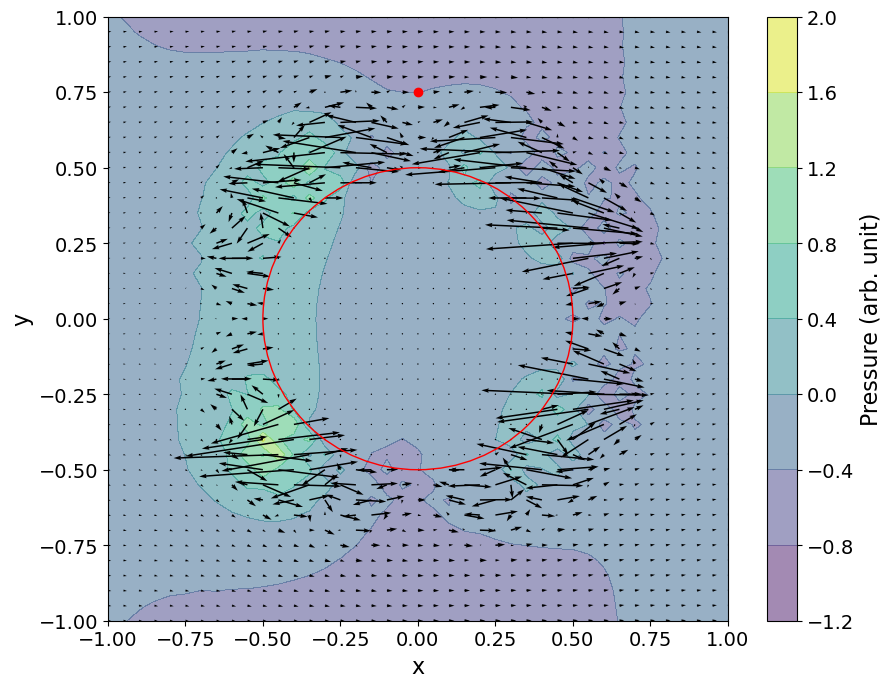

In [37]:
dx = 0.05
dy = 0.05
L = 3
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window(X)[0]:window(X)[1],window(X)[0]:window(X)[1]]
Y_win = Y[window(Y)[0]:window(Y)[1],window(X)[0]:window(X)[1]]
p_win = p[window(p)[0]:window(p)[1],window(X)[0]:window(X)[1]]
u_win = u[window(u)[0]:window(u)[1],window(X)[0]:window(X)[1]]
v_win = v[window(v)[0]:window(v)[1],window(X)[0]:window(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 5
16
0.19670617308965807 0.0322500016537179


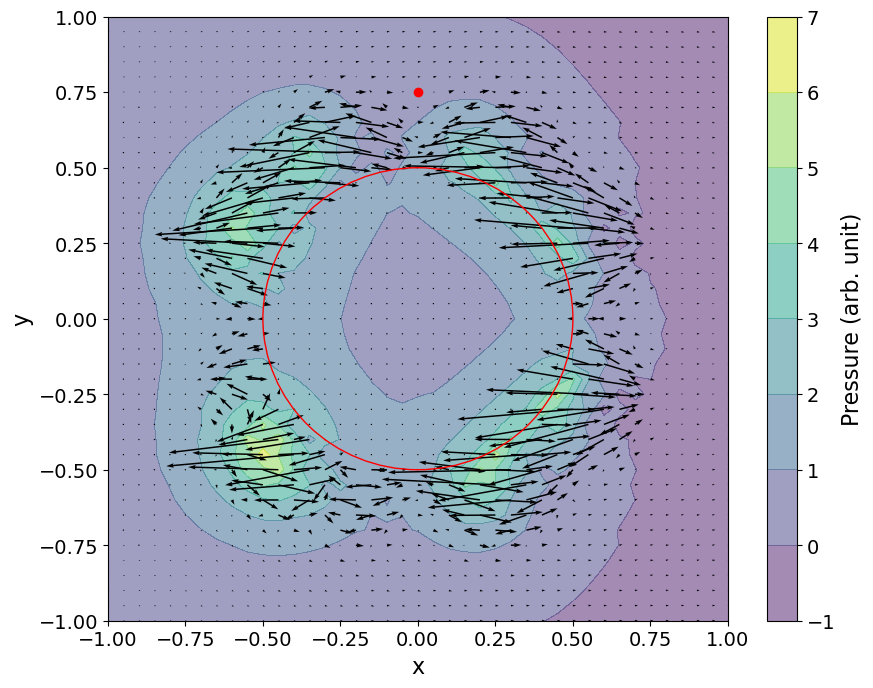

In [38]:
dx = 0.05
dy = 0.05
L = 5
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window(X)[0]:window(X)[1],window(X)[0]:window(X)[1]]
Y_win = Y[window(Y)[0]:window(Y)[1],window(X)[0]:window(X)[1]]
p_win = p[window(p)[0]:window(p)[1],window(X)[0]:window(X)[1]]
u_win = u[window(u)[0]:window(u)[1],window(X)[0]:window(X)[1]]
v_win = v[window(v)[0]:window(v)[1],window(X)[0]:window(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 9
17
0.08201199052944283 0.18890549196957954


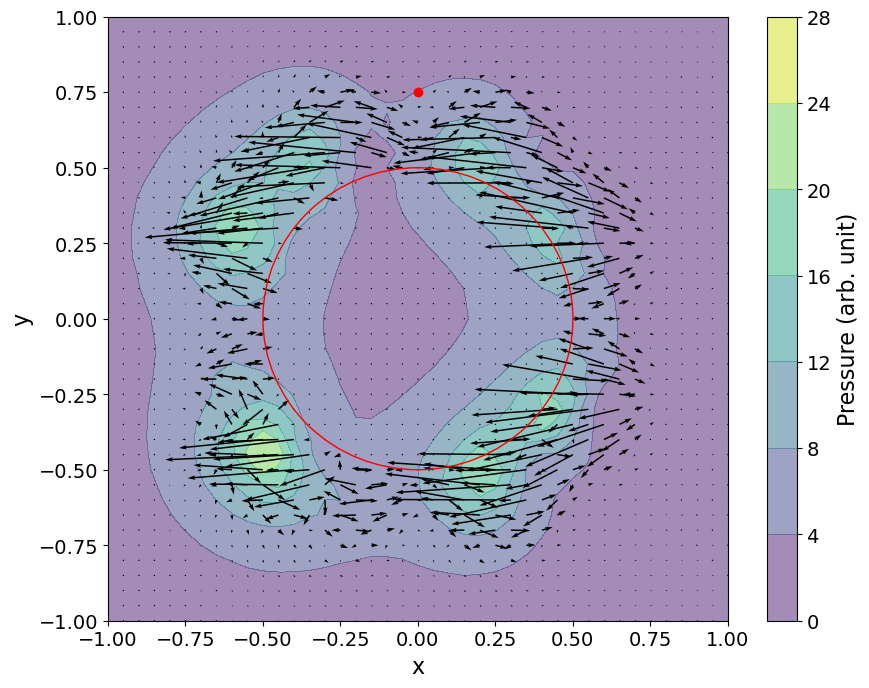

In [39]:
dx = 0.05
dy = 0.05
L = 9
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window(X)[0]:window(X)[1],window(X)[0]:window(X)[1]]
Y_win = Y[window(Y)[0]:window(Y)[1],window(X)[0]:window(X)[1]]
p_win = p[window(p)[0]:window(p)[1],window(X)[0]:window(X)[1]]
u_win = u[window(u)[0]:window(u)[1],window(X)[0]:window(X)[1]]
v_win = v[window(v)[0]:window(v)[1],window(X)[0]:window(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 16
18
-0.20097020754315253 0.5075558695839568


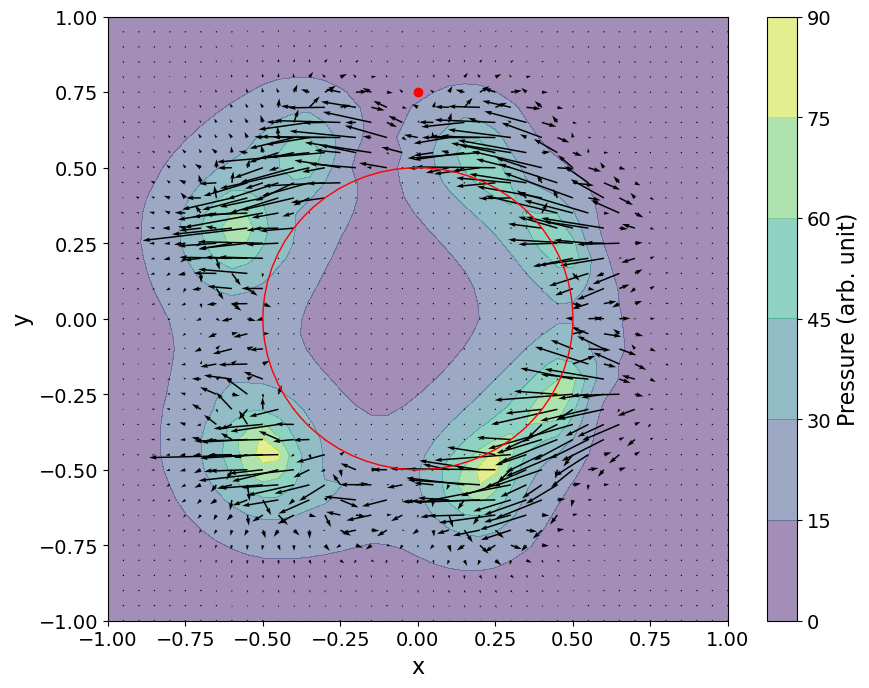

In [40]:
dx = 0.05
dy = 0.05
L = 16
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window(X)[0]:window(X)[1],window(X)[0]:window(X)[1]]
Y_win = Y[window(Y)[0]:window(Y)[1],window(X)[0]:window(X)[1]]
p_win = p[window(p)[0]:window(p)[1],window(X)[0]:window(X)[1]]
u_win = u[window(u)[0]:window(u)[1],window(X)[0]:window(X)[1]]
v_win = v[window(v)[0]:window(v)[1],window(X)[0]:window(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 28
20
-3.297066735702672 17.163403348760532


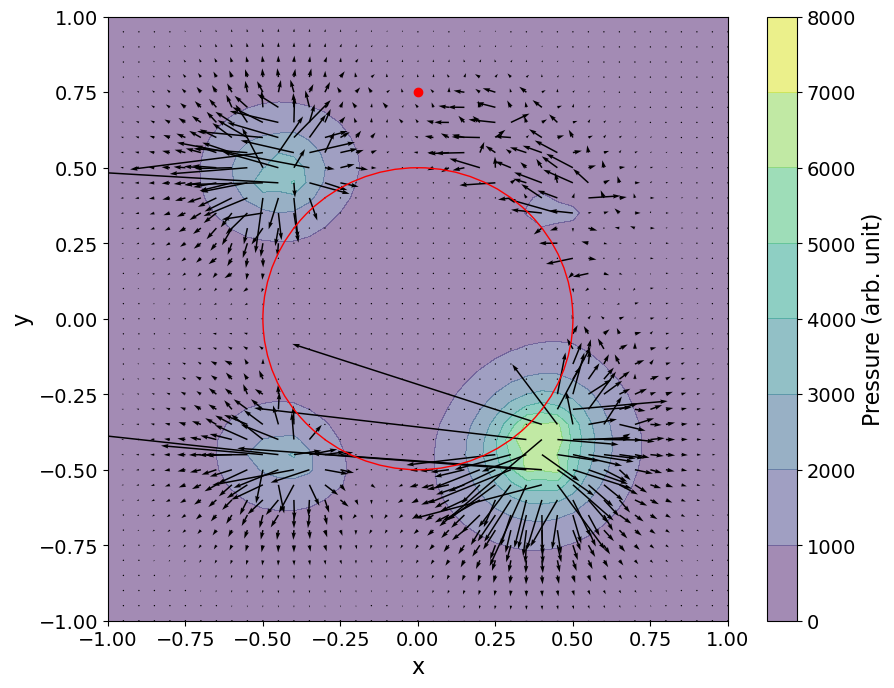

In [41]:
dx = 0.05
dy = 0.05
L = 28
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window(X)[0]:window(X)[1],window(X)[0]:window(X)[1]]
Y_win = Y[window(Y)[0]:window(Y)[1],window(X)[0]:window(X)[1]]
p_win = p[window(p)[0]:window(p)[1],window(X)[0]:window(X)[1]]
u_win = u[window(u)[0]:window(u)[1],window(X)[0]:window(X)[1]]
v_win = v[window(v)[0]:window(v)[1],window(X)[0]:window(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 50
20
-8.273242789833708 14.844346991112271


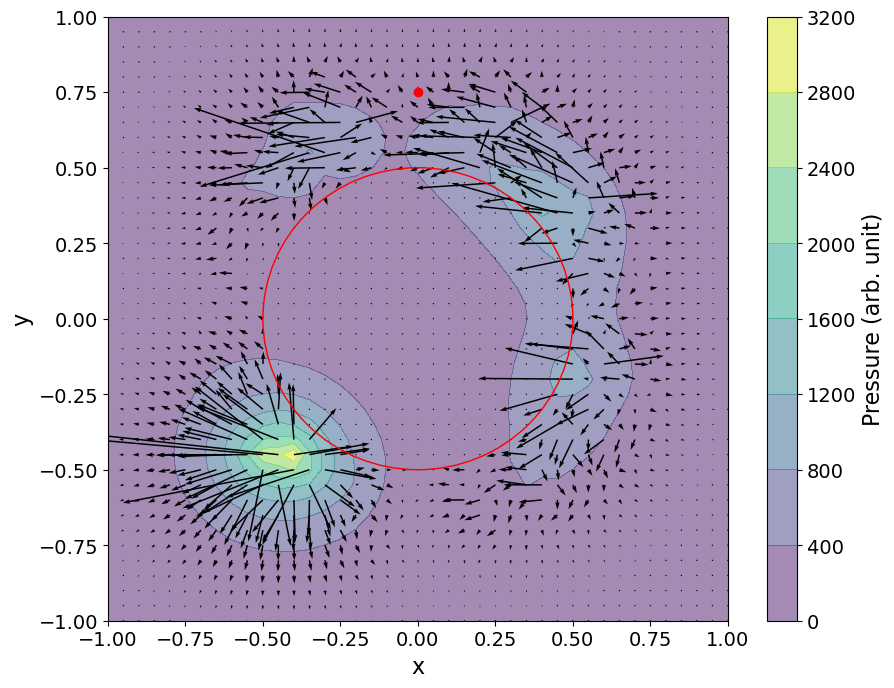

In [42]:
dx = 0.05
dy = 0.05
L = 50
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window(X)[0]:window(X)[1],window(X)[0]:window(X)[1]]
Y_win = Y[window(Y)[0]:window(Y)[1],window(X)[0]:window(X)[1]]
p_win = p[window(p)[0]:window(p)[1],window(X)[0]:window(X)[1]]
u_win = u[window(u)[0]:window(u)[1],window(X)[0]:window(X)[1]]
v_win = v[window(v)[0]:window(v)[1],window(X)[0]:window(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

In [50]:
def window25(list): #for 0.25 spacing
    row1 = int(np.floor(len(list)/2)-4)
    row2 = int(np.ceil(len(list)/2)+4)
    return row1,row2

L: 2
108
0.3306689365200135 0.029428098397788816


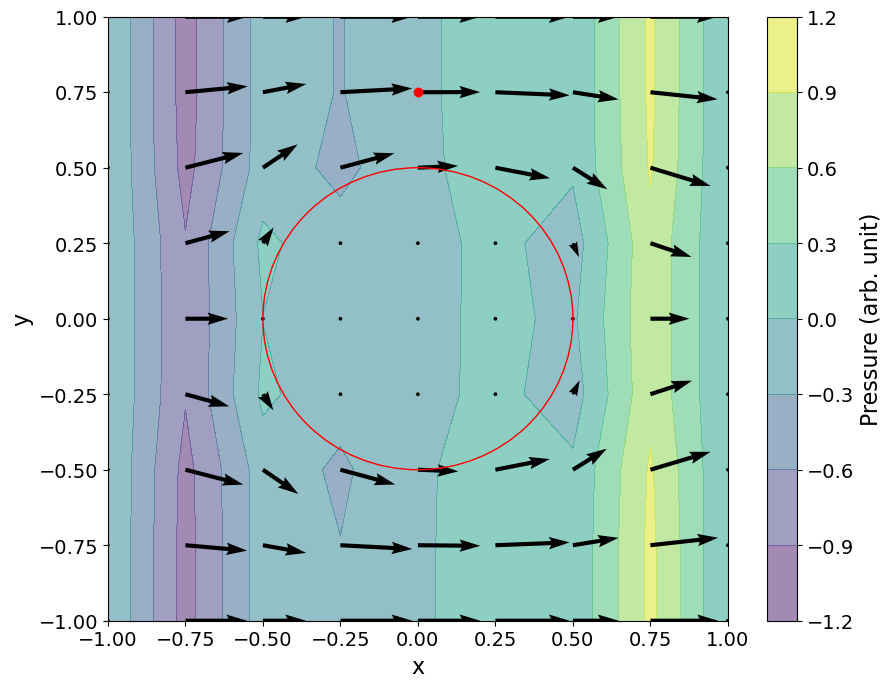

In [53]:
dx = 0.25
dy = 0.25
L = 2
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window25(X)[0]:window25(X)[1],window25(X)[0]:window25(X)[1]]
Y_win = Y[window25(Y)[0]:window25(Y)[1],window25(X)[0]:window25(X)[1]]
p_win = p[window25(p)[0]:window25(p)[1],window25(X)[0]:window25(X)[1]]
u_win = u[window25(u)[0]:window25(u)[1],window25(X)[0]:window25(X)[1]]
v_win = v[window25(v)[0]:window25(v)[1],window25(X)[0]:window25(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 3
130
0.378080769841174 0.05381893811069643


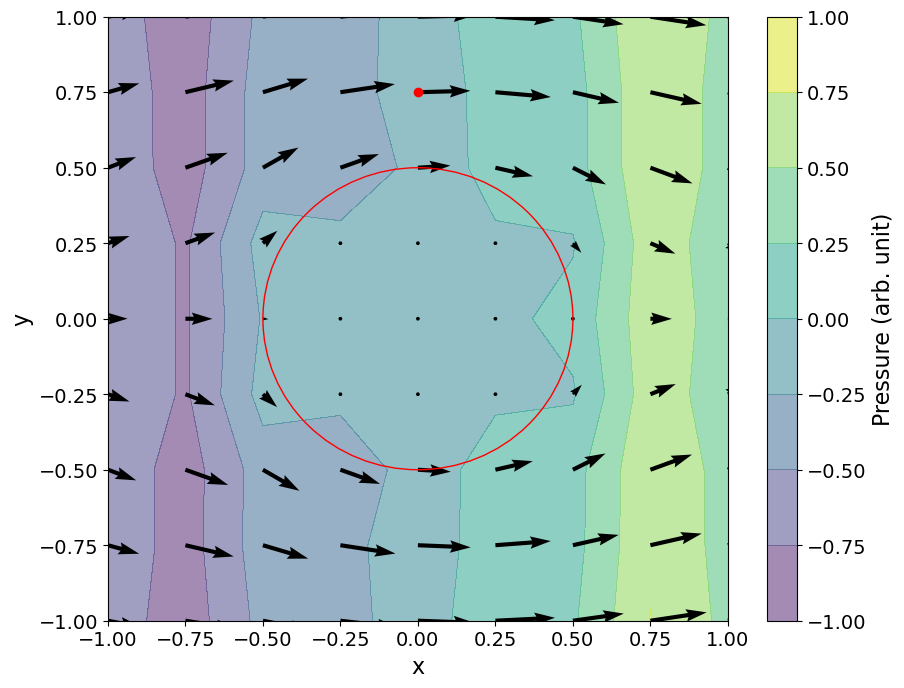

In [54]:
dx = 0.25
dy = 0.25
L = 3
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window25(X)[0]:window25(X)[1],window25(X)[0]:window25(X)[1]]
Y_win = Y[window25(Y)[0]:window25(Y)[1],window25(X)[0]:window25(X)[1]]
p_win = p[window25(p)[0]:window25(p)[1],window25(X)[0]:window25(X)[1]]
u_win = u[window25(u)[0]:window25(u)[1],window25(X)[0]:window25(X)[1]]
v_win = v[window25(v)[0]:window25(v)[1],window25(X)[0]:window25(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 5
157
0.4946716784194197 0.08273430952011503


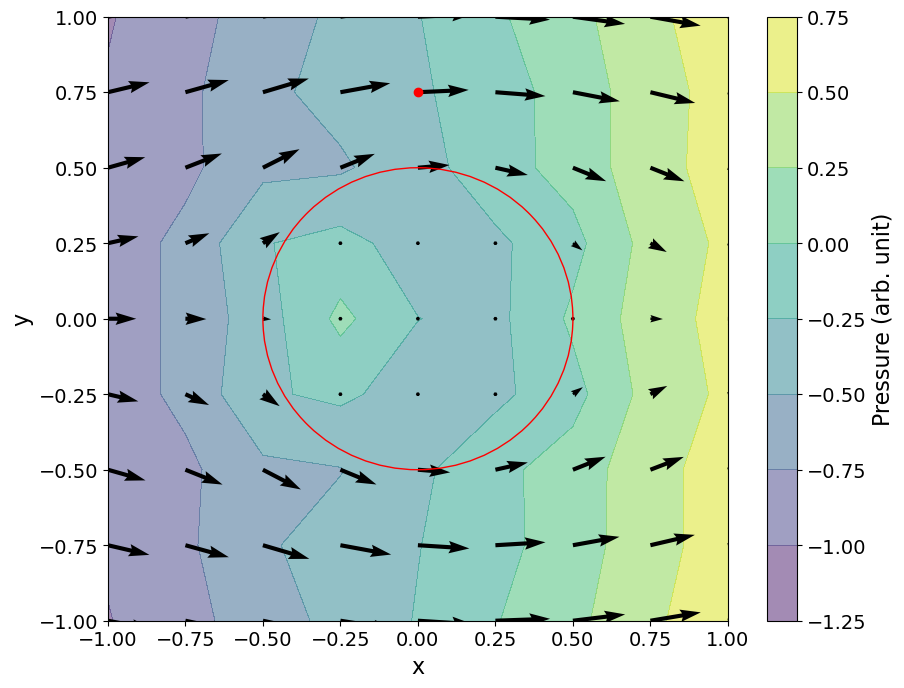

In [55]:
dx = 0.25
dy = 0.25
L = 5
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window25(X)[0]:window25(X)[1],window25(X)[0]:window25(X)[1]]
Y_win = Y[window25(Y)[0]:window25(Y)[1],window25(X)[0]:window25(X)[1]]
p_win = p[window25(p)[0]:window25(p)[1],window25(X)[0]:window25(X)[1]]
u_win = u[window25(u)[0]:window25(u)[1],window25(X)[0]:window25(X)[1]]
v_win = v[window25(v)[0]:window25(v)[1],window25(X)[0]:window25(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 9
204
0.7141588771071568 0.14059145912982346


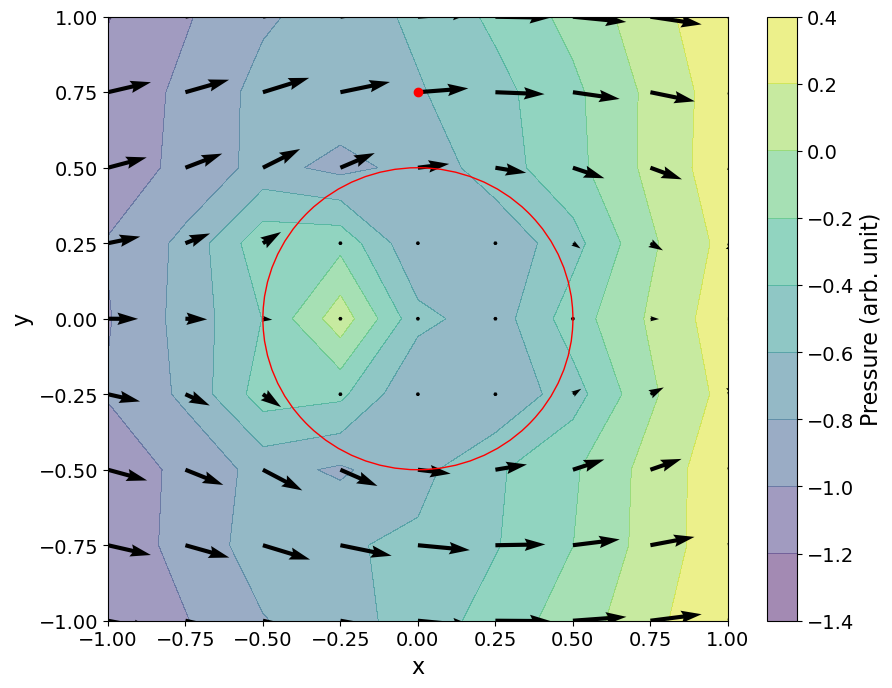

In [56]:
dx = 0.25
dy = 0.25
L = 9
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window25(X)[0]:window25(X)[1],window25(X)[0]:window25(X)[1]]
Y_win = Y[window25(Y)[0]:window25(Y)[1],window25(X)[0]:window25(X)[1]]
p_win = p[window25(p)[0]:window25(p)[1],window25(X)[0]:window25(X)[1]]
u_win = u[window25(u)[0]:window25(u)[1],window25(X)[0]:window25(X)[1]]
v_win = v[window25(v)[0]:window25(v)[1],window25(X)[0]:window25(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 16
265
1.0356553565447433 0.23756530606896395


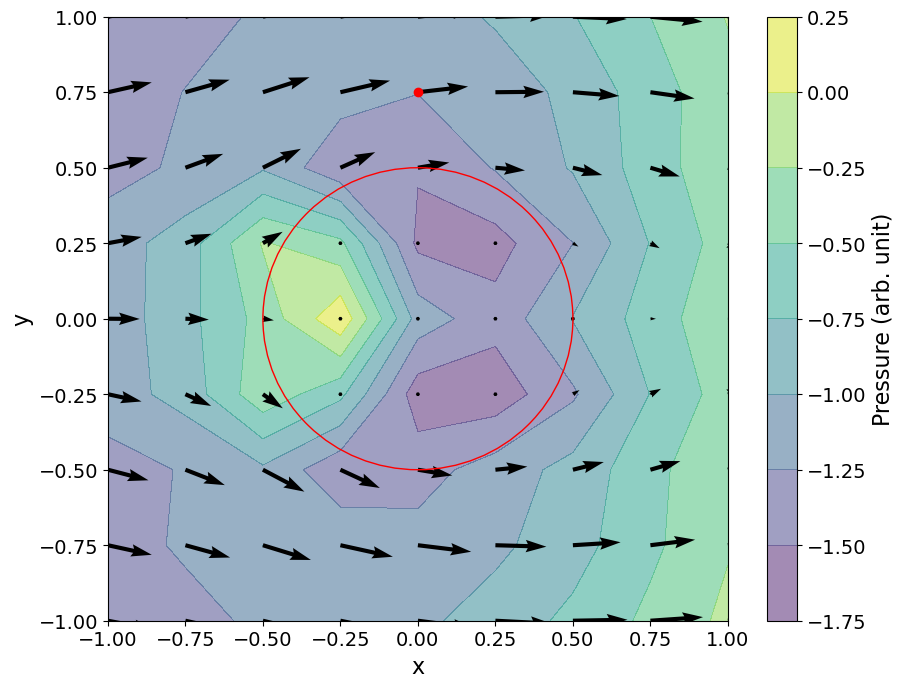

In [57]:
dx = 0.25
dy = 0.25
L = 16
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window25(X)[0]:window25(X)[1],window25(X)[0]:window25(X)[1]]
Y_win = Y[window25(Y)[0]:window25(Y)[1],window25(X)[0]:window25(X)[1]]
p_win = p[window25(p)[0]:window25(p)[1],window25(X)[0]:window25(X)[1]]
u_win = u[window25(u)[0]:window25(u)[1],window25(X)[0]:window25(X)[1]]
v_win = v[window25(v)[0]:window25(v)[1],window25(X)[0]:window25(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 28
340
1.4790635093621882 0.3796691155863513


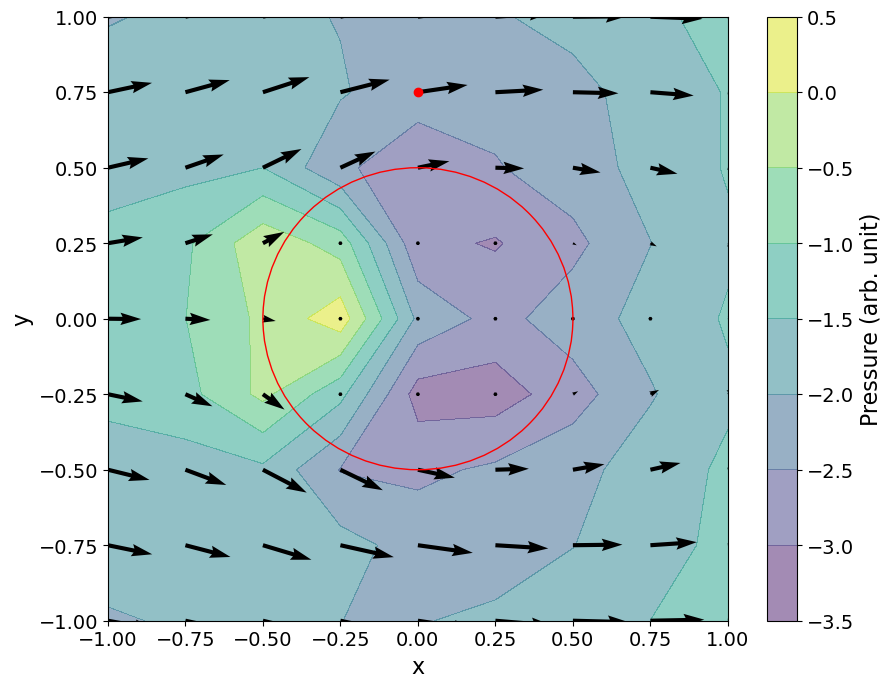

In [58]:
dx = 0.25
dy = 0.25
L = 28
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window25(X)[0]:window25(X)[1],window25(X)[0]:window25(X)[1]]
Y_win = Y[window25(Y)[0]:window25(Y)[1],window25(X)[0]:window25(X)[1]]
p_win = p[window25(p)[0]:window25(p)[1],window25(X)[0]:window25(X)[1]]
u_win = u[window25(u)[0]:window25(u)[1],window25(X)[0]:window25(X)[1]]
v_win = v[window25(v)[0]:window25(v)[1],window25(X)[0]:window25(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

L: 50
431
2.1051873667681162 0.5801911732118028


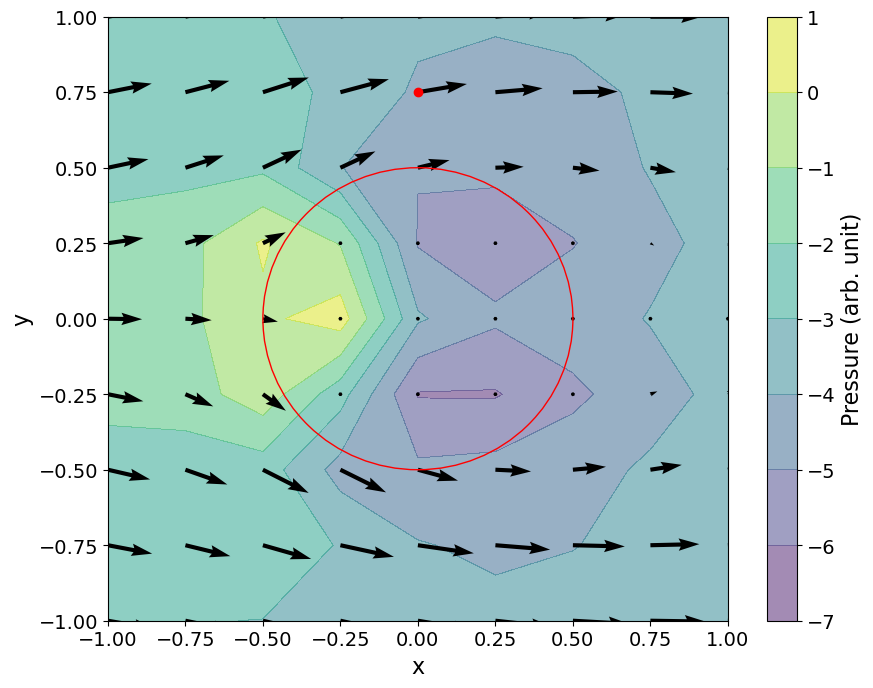

In [59]:
dx = 0.25
dy = 0.25
L = 50
#L_lt = [2,3,5,9,16,28,50]

## finding solutions
print("L: "+str(L))
u, v, p, stepcount, X, Y, nx, ny, x, y = cavity_flow(L, dx, dy)
print(stepcount)
#print(u,v)
#print(y,x)
y_ind = np.where(y == 0.75)[0][0]
x_ind = np.where(x == 0)[0][0]
#print(y_ind,x_ind)
print(np.mean(u[y_ind-1:y_ind+1,x_ind-1:x_ind+1]),np.mean(v[y_ind-1:y_ind+1,x_ind-1:x_ind+1]))


## plotting
X_win = X[window25(X)[0]:window25(X)[1],window25(X)[0]:window25(X)[1]]
Y_win = Y[window25(Y)[0]:window25(Y)[1],window25(X)[0]:window25(X)[1]]
p_win = p[window25(p)[0]:window25(p)[1],window25(X)[0]:window25(X)[1]]
u_win = u[window25(u)[0]:window25(u)[1],window25(X)[0]:window25(X)[1]]
v_win = v[window25(v)[0]:window25(v)[1],window25(X)[0]:window25(X)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
#pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
cbar = pyplot.colorbar();
cbar.set_label(label='Pressure (arb. unit)',size=16)
cbar.ax.tick_params(labelsize=14);

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)
#pyplot.quiver(X[::3, ::3],Y[::3, ::3],u[::3, ::3],v[::3, ::3])
#pyplot.quiver(X[::10, ::10],Y[::10, ::10],u[::10, ::10],v[::10, ::10])
#pyplot.quiver(X,Y,u,v)

pyplot.plot(0,0.75,'ro');
circle = pyplot.Circle((0,0),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x',fontsize=16);
pyplot.ylabel('y',fontsize=16);
#pyplot.title('NS distant boundaries: L = '+f'{L}');
ax.tick_params(labelsize=14);

In [ ]:
def window01(list): #for 0.01 spacing
    row1 = int(np.floor(len(list)/2)-100)
    row2 = int(np.ceil(len(list)/2)+100)
    return row1,row2

[ 0.15170088  0.16119086  0.18429094  0.05567254 -0.25249627 -3.49607216
 -8.70567738]
[0.07158722 0.08675596 0.12415229 0.26339454 0.51526065 1.99005427
 4.3243459 ]
[4.12570858e-03 2.70212547e-02 3.01464888e-02 1.90918577e-01
 5.18805476e-01 1.78627256e+01 1.54386868e+01]
[0.01012096 0.01071907 0.02103513 0.02013085 0.11249607 6.9932226
 5.94339826]


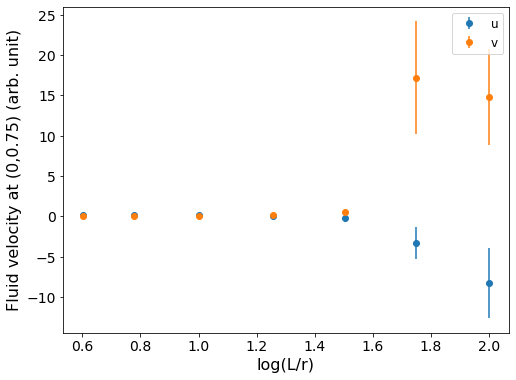

In [68]:
fig2,ax2 = pyplot.subplots(figsize=(8,6))

L_list = np.array([2,3,5,9,16,28,50])
log_ratios = np.log10(L_list/0.5)

#BCs velocity = 1
#u05 = [0.6299364023373026, 0.5983800491096098, 0.4061440002039412, 0.08609031900031644, -0.2009702075346188, -3.297066735702672, -8.273242789833708]
#v05 = [0.04241659899189775, 0.06342050836716834, 0.03719576526566136, 0.18898540611966488, 0.5075558695823977, 17.163403348760532, 14.844346991112271]
#u25 = [1.4243684116092044, 1.3220299930927, 1.3114522307603291, 1.4414791149271036, 1.696640636921948, 2.081569399947326, 2.648090185212763]
#v25 = [0.17447472889204546, 0.2517503444221898, 0.28463531937531333, 0.34383426726243044, 0.4372481168686183, 0.5674423216954874, 0.7516404657886446]

#BCs velocity = 0.01
u05 = [0.15885960448816638, 0.1698664555307873, 0.19670617308965807, 0.08201199052944283, -0.20097020754315253, -3.297066735702672, -8.273242789833708]
v05 = [0.005137804177356775, 0.028093162008048393, 0.0322500016537179, 0.18890549196957954, 0.5075558695839568, 17.163403348760532, 14.844346991112271]
u25 = [0.3306689365200135, 0.378080769841174, 0.4946716784194197, 0.7141588771071568, 1.0356553565447433, 1.4790635093621882, 2.1051873667681162]
v25 = [0.029428098397788816, 0.05381893811069643, 0.08273430952011503, 0.14059145912982346, 0.23756530606896395, 0.3796691155863513, 0.5801911732118028]

#errs = np.full_like(log_ratios, 0.5)

## Richardson extrapolation
r = 0.25/0.05
p = 2
u = np.array(u05) + (np.array(u05)-np.array(u25)) / (r**p - 1)
du = 10*np.abs(u - np.array(u05))

v = np.array(v05) + (np.array(v05)-np.array(v25)) / (r**p - 1)
dv = 10*np.abs(v - np.array(v05))
print(u)
print(du)
print(v)
print(dv)
## number reported as u05 pm du


#ax2.plot(log_ratios,u05,linestyle='--',label='u (dx, dy = 0.05)')
ax2.errorbar(log_ratios,u05,yerr=du,fmt='o',ls='',label='u')
#ax2.plot(log_ratios,v05,label='v (dx, dy = 0.05)')
ax2.errorbar(log_ratios,v05,yerr=dv,fmt='o',ls='',label='v')
#ax2.plot(log_ratios,u25,linestyle='--',label='u (dx, dy = 0.25)')
#ax2.plot(log_ratios,v25,label='v (dx, dy = 0.25)')

#ax2.plot(log_ratios,u25,label='u')
#ax2.plot(log_ratios,v25,label='v')

#ax2.set_title('u and v vs. log(L/r)')
ax2.set_xlabel('log(L/r)', fontsize=16)
ax2.set_ylabel('Fluid velocity at (0,0.75) (arb. unit)', fontsize=16)
pyplot.legend(prop={'size':12});
ax2.tick_params(labelsize=14);